In [1]:
gt_path = 'simulated/v8_gt/'
gk_path = 'simulated/v8_ginkgo/'
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

In [2]:
def get_dict(df):
    d_mat = df.drop(df.columns[[0,1,2]], axis = 1)
    d = d_mat.to_dict(orient='list')
    d = {x.replace(' ', ''): v for x, v in d.items()}
    return d

In [3]:
result = []
for i in range(10):
    gt = pd.read_csv(gt_path + 'real_rep' + str(i) + '/gt_leaf.segcopy', sep = '\t')
    #print(gt.head(5))
    d_gt = get_dict(gt)
    gk = pd.read_csv(gk_path + 'real_rep' + str(i) + '/gt_nex.cnp', sep = '\t')
    d_gk = get_dict(gk)
    for key in d_gt:
        result.append(hamming(d_gt[key], d_gk[''+ key]))

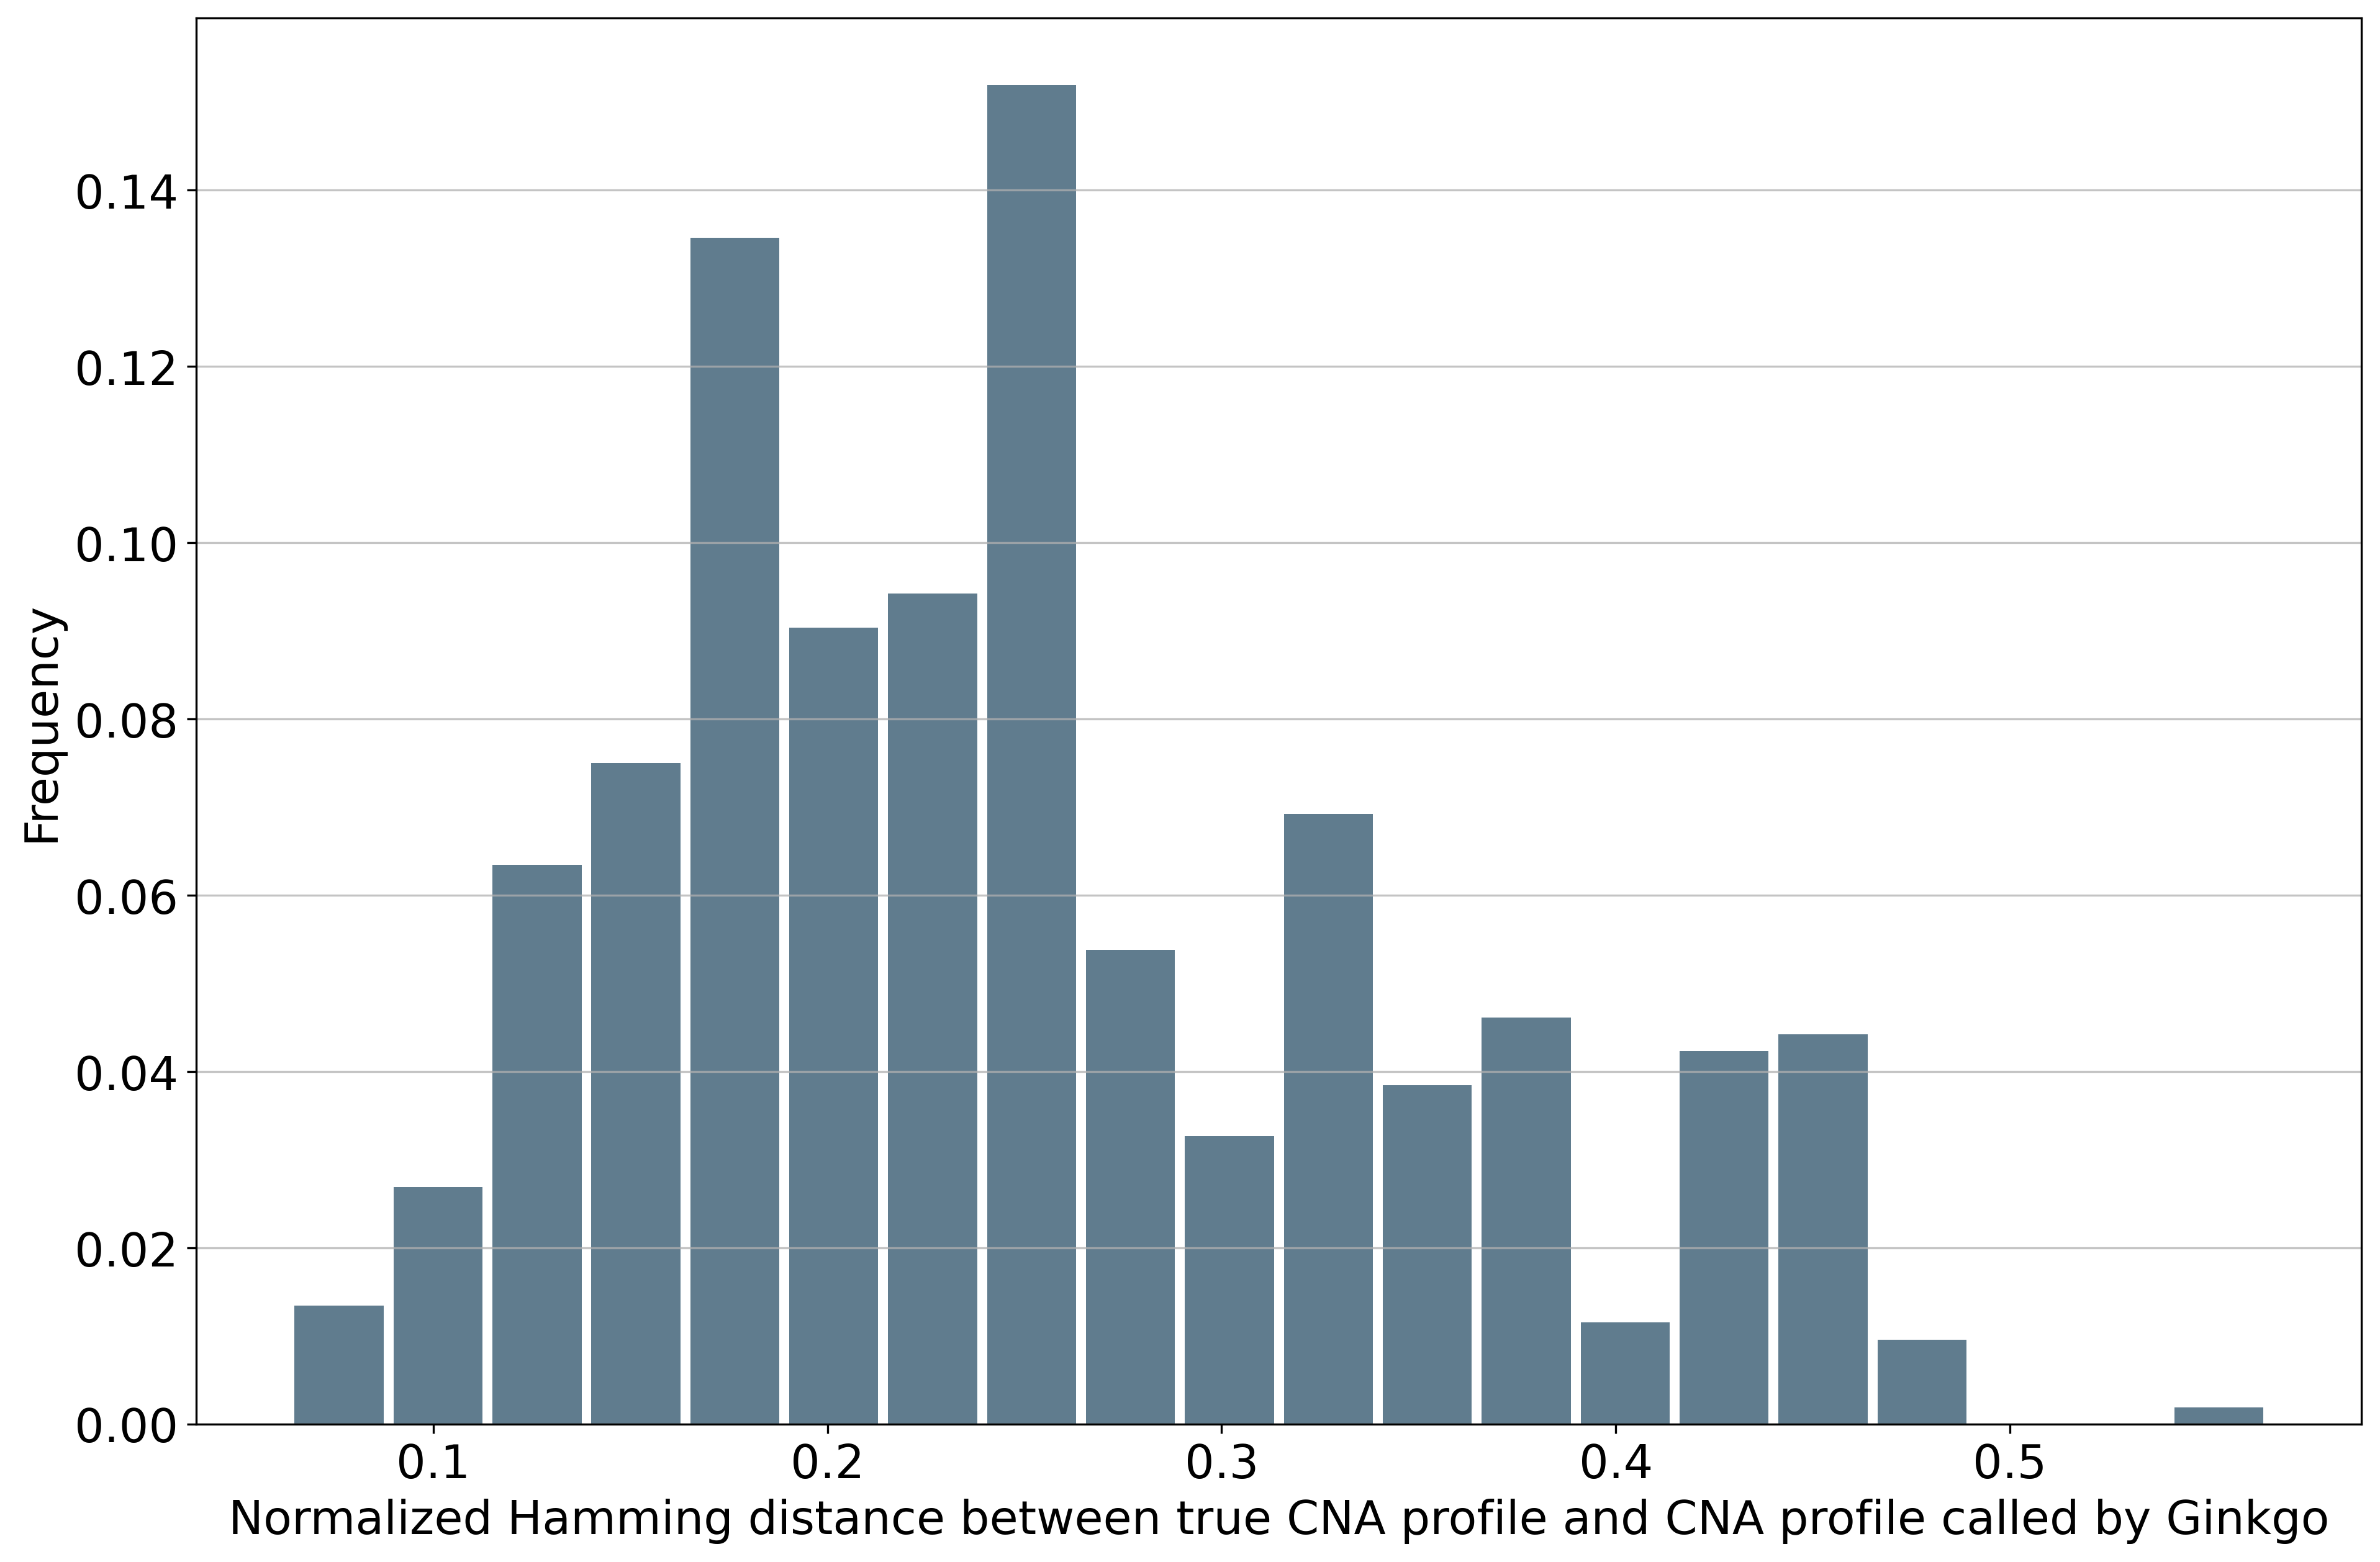

In [4]:
figure(figsize=(15, 10), dpi=300)
# = np.histogram(result, 20, density = True, weights = )
hist, bins = np.histogram(result, 20, weights=np.ones(len(result)) / len(result))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.hist(bins[:-1], bins, weights=hist, color='#607c8e',rwidth=0.9)
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Normalized Hamming distance between true CNA profile and CNA profile called by Ginkgo',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis='y', alpha=0.75)